In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pynapple as nap
import pickle

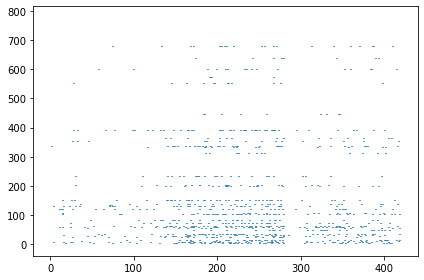

In [5]:
with open('DIV17_cs3_baseline2PDBu2CNQXDur420sInt550msBin550ms_filtered.pkl', 'rb') as f:
    data = pickle.load(f)
df_cell_stats = data['cell_stats']
df_cell_stats

for idx in df_cell_stats['NeuronId']:
#     print(idx)
    plt.eventplot(df_cell_stats[df_cell_stats['NeuronId']==idx]['SpikesTimes'],lineoffsets=idx,linelength=0.8)
plt.tight_layout()

In [6]:
## if you only want to use the time point of spikes

# df_cell_stats
# my_ts = {}

# for idx in df_cell_stats['NeuronId'][0:]:
# #     print(idx)
#     my_ts[idx] = nap.Ts(t=df_cell_stats[df_cell_stats['NeuronId']==id]['SpikesTimes'][0],time_units='s')
    
# my_tsGroup = nap.TsGroup(my_ts)
# my_tsGroup.restrict(Interval_1)

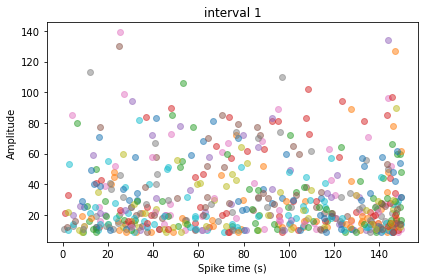

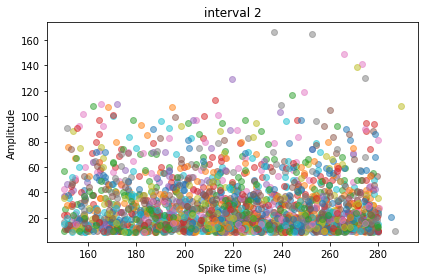

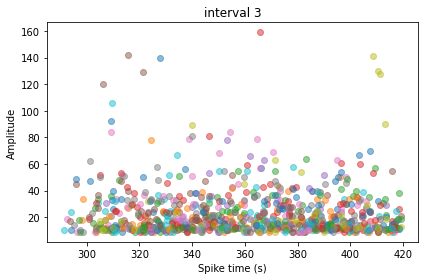

In [8]:
## here I generate a dictionary that contains nap.Tsd (timeseries data) objects, which is easy to handle when you want to do
## so you can later all each neurons with their ids

my_tsd = {}
for idx in df_cell_stats['NeuronId'][0:]:
    my_tsd[idx] = nap.Tsd(t=df_cell_stats[df_cell_stats['NeuronId']==idx]['SpikesTimes'][idx],
                          d=df_cell_stats[df_cell_stats['NeuronId']==idx]['Amplitudes'][idx],time_units='s')

    
## Define the intervals you want to extract, here the unit is in second, so might be different from frames.
## You can later use the .restrict(intervals) function on the nap.Tsd object to only extract the events 
## happening in this period of time.

Interval_1 = nap.IntervalSet(0,150)
Interval_2 = nap.IntervalSet(150,290)
Interval_3 = nap.IntervalSet(290,450)
    
interval_set = [Interval_1,
                Interval_2,
                Interval_3] 

## you can change this to any other interval values
## There will be error messages when there is not spikes in the list after the restriction, 
## but you can just ignore that. Here I shut that down in this cell.

import warnings
warnings.filterwarnings('ignore')
## just to get rid of the warnings


## plot spike time vs amplitude in each intervals
plt.figure()
for i in range(3):
    plt.title(f'interval {i+1}')
    for idx in my_tsd.keys():
        plt.plot(my_tsd[idx].restrict(interval_set[i]).index,my_tsd[idx].restrict(interval_set[i]).values,color=f'C{idx}',marker='o',ls='',alpha=0.5)
    plt.ylabel('Amplitude')
    plt.xlabel('Spike time (s)')
    plt.tight_layout()
    plt.show()

## You can then just group the amplitude as you want for later analysis